## [Write an introduction]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat

In [2]:
datafile = "../../dataset/ch02/student_survey.txt"
student_survey = pd.read_csv(datafile, sep='\t')

In [3]:
student_survey.head() 

,Gender,Do.you.believe.in.God,Pick.Random.Number,Height,Hand,Dates,FB.Friends,Weight,Drinks,Varsity,Songs,Diet,Politics.9Cat,Politics.numeric,Politics.3Cat
0,Female,Not sure,6,71.0,Predominantly Left Handed,1.0,314.0,138.0,0,Yes,1564.0,Omnivore,2. Very Liberal,2.0,Liberal
1,Male,No,2,66.0,Predominantly Right Handed,2.0,1228.0,130.0,0,No,97.0,Vegetarian,2. Very Liberal,2.0,Liberal
2,Male,Yes,9,73.0,Predominantly Right Handed,1.0,1189.0,183.0,0,Yes,1397.0,Carnivore,7. Moderatly Conservative,7.0,Conservative
3,Female,No,6,67.0,Predominantly Right Handed,1.0,0.0,125.0,0,No,2241.0,Omnivore,3. Moderately Liberal,3.0,Liberal
4,Male,Yes,7,71.0,Predominantly Right Handed,0.0,709.0,245.0,0,No,1299.0,Omnivore,5. Independent/Middle of Road,5.0,Moderate


In [4]:
# sc
len(student_survey)

299

In [5]:
# sc
student_survey.columns

Index(['Gender', 'Do.you.believe.in.God', 'Pick.Random.Number', 'Height',
       'Hand', 'Dates', 'FB.Friends', 'Weight', 'Drinks', 'Varsity', 'Songs',
       'Diet', 'Politics.9Cat', 'Politics.numeric', 'Politics.3Cat'],
      dtype='object')

In [6]:
diet = student_survey["Diet"]
politics = student_survey["Politics.3Cat"] 

In [7]:
print(f'Total Number of Rows: {len(student_survey)}')

Total Number of Rows: 299


In [8]:
print(f'{diet.isna().sum()} data missing in Diet')

6 data missing in Diet


In [9]:
print(f'{politics.isna().sum()} data missing in Politics.3Cat')

4 data missing in Politics.3Cat


In [10]:
# sc
diet.value_counts()

Omnivore      227
Carnivore      41
Vegetarian     25
Name: Diet, dtype: int64

In [11]:
# sc
politics.value_counts()

Liberal         162
Moderate        105
Conservative     28
Name: Politics.3Cat, dtype: int64

In [12]:
pd.crosstab(index=politics, columns=diet, margins=True)

Diet,Carnivore,Omnivore,Vegetarian,All
Politics.3Cat,,,,
Conservative,10,18,0,28
Liberal,13,127,17,157
Moderate,16,81,7,104
All,39,226,24,289


In [13]:
# plot stacked bar chart by TRANSPOSE
# columns -> x-ticks
# index -> legend

pd.crosstab(index=politics, columns=diet, 
            normalize='columns', 
            margins=True
           ).mul(100).round(1).astype(str) + '%'  # pro-5(a)

Diet,Carnivore,Omnivore,Vegetarian,All
Politics.3Cat,,,,
Conservative,25.6%,8.0%,0.0%,9.7%
Liberal,33.3%,56.2%,70.8%,54.3%
Moderate,41.0%,35.8%,29.2%,36.0%


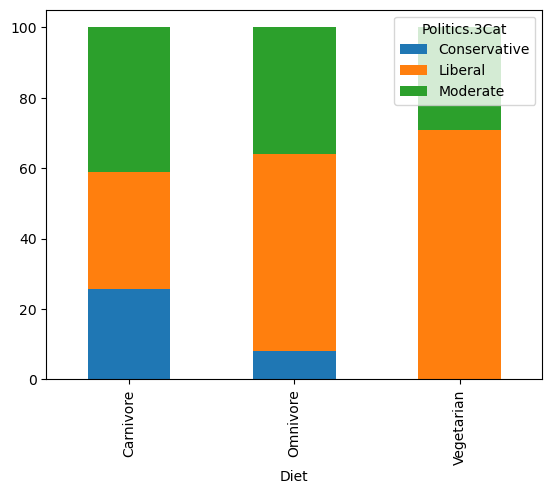

In [14]:
# transpose the data, so that each row is plotted as a group of bars
# and different rows are stacked to 100%

pd.crosstab(index=politics, columns=diet, 
            normalize='columns', 
           ).mul(100).T.plot(kind='bar', stacked=True);

In [15]:
# plot stacked bar chart by NORMALIZing along the INDEX dimension
# columns -> legend
# index -> x-ticks
pd.crosstab(index=diet, columns=politics, 
            normalize='index', 
            margins=True
           ).mul(100).round(1).astype(str) + '%'

Politics.3Cat,Conservative,Liberal,Moderate
Diet,,,
Carnivore,25.6%,33.3%,41.0%
Omnivore,8.0%,56.2%,35.8%
Vegetarian,0.0%,70.8%,29.2%
All,9.7%,54.3%,36.0%


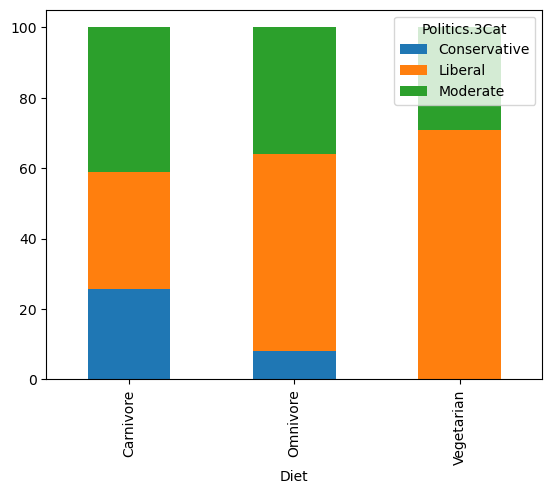

In [16]:
pd.crosstab(index=diet, columns=politics, 
            normalize='index').mul(100).plot(kind='bar', stacked=True);  # pro-5(a)

**Answer: 5(a)**

The plot shows conditinoal probabilities. The distribution of politic, is conditional on the diet preference.

**Answer: 5(b)**

**TODO**
Yes, I think the differences in here are real. The plot display a conditional distribution on respondents' diet preference and their political alignment. A person with vegetarian, and he may most likely a liberal. A person has the conservative alignment, and he may have carnivore preference. 



In [19]:
pd.crosstab(index=diet, columns=politics, normalize='columns',
           margins=True).mul(100).round(1).astype(str) + '%'

Politics.3Cat,Conservative,Liberal,Moderate,All
Diet,,,,
Carnivore,35.7%,8.3%,15.4%,13.5%
Omnivore,64.3%,80.9%,77.9%,78.2%
Vegetarian,0.0%,10.8%,6.7%,8.3%


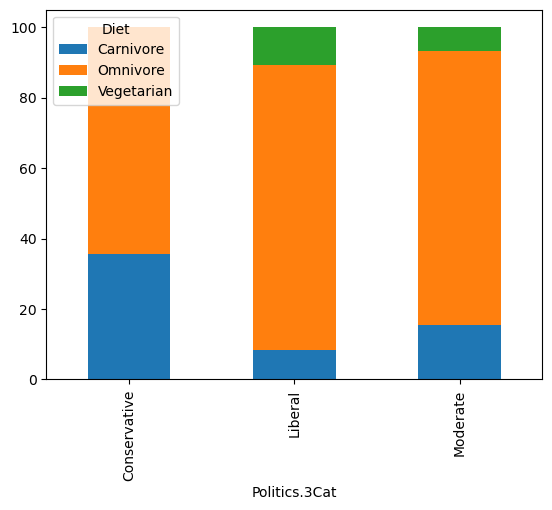

In [20]:
pd.crosstab(index=politics, columns=diet,
           normalize='index').mul(100).plot(kind='bar', stacked=True);  # pro-6(a)

**6(a)**

The stacked bars above show a conditional probability.
For example, the first bar shows, given a student being conservative, it is unlikely to be vegetarian.

In [22]:
student_survey.head()

,Gender,Do.you.believe.in.God,Pick.Random.Number,Height,Hand,Dates,FB.Friends,Weight,Drinks,Varsity,Songs,Diet,Politics.9Cat,Politics.numeric,Politics.3Cat
0,Female,Not sure,6,71.0,Predominantly Left Handed,1.0,314.0,138.0,0,Yes,1564.0,Omnivore,2. Very Liberal,2.0,Liberal
1,Male,No,2,66.0,Predominantly Right Handed,2.0,1228.0,130.0,0,No,97.0,Vegetarian,2. Very Liberal,2.0,Liberal
2,Male,Yes,9,73.0,Predominantly Right Handed,1.0,1189.0,183.0,0,Yes,1397.0,Carnivore,7. Moderatly Conservative,7.0,Conservative
3,Female,No,6,67.0,Predominantly Right Handed,1.0,0.0,125.0,0,No,2241.0,Omnivore,3. Moderately Liberal,3.0,Liberal
4,Male,Yes,7,71.0,Predominantly Right Handed,0.0,709.0,245.0,0,No,1299.0,Omnivore,5. Independent/Middle of Road,5.0,Moderate


In [23]:
men = student_survey[student_survey.Gender=='Male']
women = student_survey[student_survey.Gender=='Female']

In [24]:
pd.crosstab(index=men['Politics.3Cat'], columns=men['Diet'], margins=True)

Diet,Carnivore,Omnivore,Vegetarian,All
Politics.3Cat,,,,
Conservative,9,14,0,23
Liberal,9,74,5,88
Moderate,12,54,1,67
All,30,142,6,178


In [25]:
pd.crosstab(index=women['Politics.3Cat'], columns=women['Diet'], margins=True)

Diet,Carnivore,Omnivore,Vegetarian,All
Politics.3Cat,,,,
Conservative,1,4,0,5
Liberal,4,53,12,69
Moderate,4,27,6,37
All,9,84,18,111


In [26]:
pd.crosstab(index=men['Politics.3Cat'], columns=men['Diet'], 
            margins=True, normalize='all').mul(100).round(2).astype(str) + '%'

Diet,Carnivore,Omnivore,Vegetarian,All
Politics.3Cat,,,,
Conservative,5.06%,7.87%,0.0%,12.92%
Liberal,5.06%,41.57%,2.81%,49.44%
Moderate,6.74%,30.34%,0.56%,37.64%
All,16.85%,79.78%,3.37%,100.0%


In [28]:
print(f'(a1) Answer: \nMen has a probability of {9/178*100: .2f}% being Conservative Carnivore.')  # pro-9(a)

(a1) Answer: 
Men has a probability of  5.06% being Conservative Carnivore.


In [27]:
pd.crosstab(index=women['Politics.3Cat'], columns=women['Diet'], 
            margins=True, normalize='all').mul(100).round(2).astype(str) + '%'

Diet,Carnivore,Omnivore,Vegetarian,All
Politics.3Cat,,,,
Conservative,0.9%,3.6%,0.0%,4.5%
Liberal,3.6%,47.75%,10.81%,62.16%
Moderate,3.6%,24.32%,5.41%,33.33%
All,8.11%,75.68%,16.22%,100.0%


In [29]:
print(f'(a2) Anser: \nWomen has a probability of {1/111*100: .2f}% being Conservative Carnivore.')  # pro-9(a)

(a2) Anser: 
Women has a probability of  0.90% being Conservative Carnivore.


In [30]:
print(f'Men is more likely than women to be Conservitive Carnivore.')  # pro-9(a) 

Men is more likely than women to be Conservitive Carnivore.


In [31]:
print(f'(b1) Answer: \nMen has a probability of {5/178*100: .2f}% being Liberal Vegetarians.')  # pro-9(b)

(b1) Answer: 
Men has a probability of  2.81% being Liberal Vegetarians.


In [32]:
print(f'(b2) Anser: \nWomen has a probability of {12/111*100: .2f}% being Liberal Vegatarians.')  # pro-9(b)

(b2) Anser: 
Women has a probability of  10.81% being Liberal Vegatarians.


In [33]:
print(f'Women is more likely than men to be Liberal Vegatarians.')  # pro-9(b)

Women is more likely than men to be Liberal Vegatarians.


# pro-9(b)
Men's table: there are 5 men are liberal vegetarian. Women's table: there are 12 women are liberal vegetarian. A liberal vegetarian is more likely to be a woman.

In [34]:
gender = student_survey["Gender"]

In [37]:
pd.crosstab(index=politics, columns=gender, 
            margins=True, normalize='columns').mul(100).round(1)  # pro-25(a)

Gender,Female,Male,All
Politics.3Cat,,,
Conservative,4.3,12.8,9.5
Liberal,63.8,49.2,54.9
Moderate,31.9,38.0,35.6


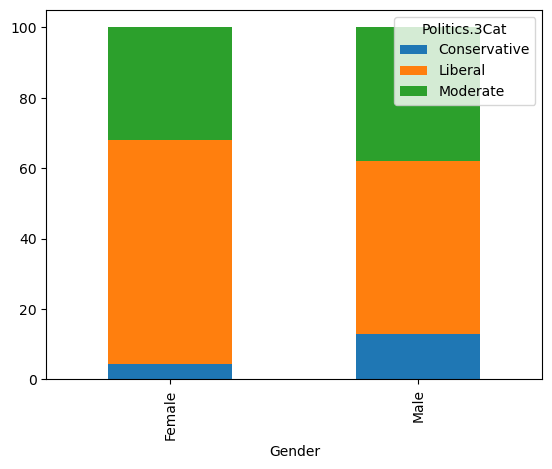

In [40]:
pd.crosstab(index=politics, columns=gender, 
            margins=False, normalize='columns').mul(100).T.plot(kind='bar', stacked=True);

In [36]:
print ('The top is devide by three categories: conservative, liberal and moderate.')
print ('It is clear that in each category, there are more men than women by viewing from the bottom.')
print(f'The above table shows that men have 179, and women have 116. Therefore, there are more men than women in the survey.')

The top is devide by three categories: conservative, liberal and moderate.
It is clear that in each category, there are more men than women by viewing from the bottom.
The above table shows that men have 179, and women have 116. Therefore, there are more men than women in the survey.


In [ ]:
pd.crosstab(index=politics, columns=gender, 
            normalize='columns', margins=True).mul(100).round(1).astype(str) + '%'  # pro-25(b)

In [ ]:
print('From the mosaic plot, it shows women are more likely to be literal and moderate. It only have very small amount of women is conservative')
print('')

In [ ]:
pd.crosstab(index=politics, columns=diet, margins=True)  # pro-25(c)

In [ ]:
pd.crosstab(index=politics, columns=diet, normalize='columns', 
            margins=True).mul(100).round(1).astype(str) + '%'  # pro-25(c)

In [ ]:
pd.crosstab(index=men['Politics.3Cat'], columns=men['Diet'], margins=True)  # pro-25(d)

In [ ]:
pd.crosstab(index=men['Politics.3Cat'], columns=men['Diet'], normalize='columns', 
            margins=True).mul(100).round(1).astype(str) + '%'  # pro-25(d)

In [ ]:
pd.crosstab(index=women['Politics.3Cat'], columns=women['Diet'], margins=True)  # pro-25(d)

In [ ]:
pd.crosstab(index=women['Politics.3Cat'], 
            columns=women['Diet'], normalize='columns',
            margins=True).mul(100).round(1).astype(str) + '%'  # pro-25(d)

In [ ]:
pd.crosstab(index=politics, columns=diet, normalize='index', 
            margins=True).mul(100).round(1).astype(str) + '%'  # pro-47(a)

In [ ]:
pd.crosstab(index=diet, columns=politics, 
            normalize='index').mul(100).plot(kind='bar', stacked=True);  # pro-47(a)

pro-47(a)
Yes, I can spot the original data among the 8 new charts. The plot that shows the real data is the one in the upper right. 

# pro-47 (b)
Only the real data can show the truth of the plot. The plots of the simulated data were make up and it cannot show the truth. This supports me to answer to the Exercise 5b that the differences display in the plot are the conditional distribution on the respondents' diet preference and their political alignment.